## Setup Environment

In [ ]:
# Install specific libraries
! pip install transformers
! pip install pycaret
!pip install pandas torch transformers tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 88.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 91.4 MB/s

In [ ]:
#importing libaries
import numpy as np
import pandas as pd
import pycaret
import transformers
from transformers import AutoModel, BertTokenizerFast
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch
import torch.nn as nn

## Load Dataset

In [ ]:
# Load Dataset
data = pd.read_csv('/content/Fake_train.csv')


# Generate labels True/Fake under new Target Column in data
data['label'] = ['True']*len(data)



# See how the data looks like
print(data.shape)
data.head()

(3257, 2)


,text,label
0,നല്ല അവതരണം. സത്യം പുറത്തു വരട്ടെ,True
1,Masha Allah,True
2,"അന്വേഷണം കഴിയുമ്പോൾ,. C. A. A. യ്ക്ക് എതിരായ ക...",True
3,Illathentha avaru purath vidayittalland verenth,True
4,Barana pakshathin matoru niyamam.nalla moyanth...,True


In [ ]:
import re

# Load your Malayalam dataset
# Replace 'malayalam_dataset.csv' with your file path
data = pd.read_csv('/content/Fake_train.csv')

# Preprocessing function for Malayalam text
def preprocess_malayalam(text):
    # Normalize text - (You might use Indic Normalization techniques if available)
    # Example normalization: (You may need to adjust this based on your data)
    text = text.replace('\u200d', '')  # Removing Zero Width Joiner

    # Remove non-Malayalam Unicode characters
    malayalam_unicode_range = r'[\u0D00-\u0D7F\s]'  # Malayalam Unicode range
    text = re.sub(malayalam_unicode_range, ' ', text)

    # Tokenize text (This can be more complex for languages with complex scripts)
    tokens = text.split()  # Basic splitting by space for example

    # Remove non-alphabetic characters
    cleaned_tokens = [word for word in tokens if word.isalpha()]

    # Join tokens back to text
    processed_text = ' '.join(cleaned_tokens)

    return processed_text

# Apply preprocessing to the 'text' column
data['processed_text'] = data['text'].apply(preprocess_malayalam)

# Display the preprocessed data
print(data.head())

                                                text     label  \
0                  നല്ല അവതരണം. സത്യം പുറത്തു വരട്ടെ      Fake   
1                                        Masha Allah      Fake   
2  അന്വേഷണം കഴിയുമ്പോൾ,. C. A. A. യ്ക്ക് എതിരായ ക...      Fake   
3    Illathentha avaru purath vidayittalland verenth      Fake   
4  Barana pakshathin matoru niyamam.nalla moyanth...  original   

                                    processed_text  
0                                                   
1                                      Masha Allah  
2                                                   
3  Illathentha avaru purath vidayittalland verenth  
4        Barana pakshathin matoru moyanth manthrii  


In [ ]:
# encoding the labels
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(data['label'])
data['outcome'] = le.transform(data['label'])
data

,text,label,processed_text,outcome
0,നല്ല അവതരണം. സത്യം പുറത്തു വരട്ടെ,Fake,,0
1,Masha Allah,Fake,Masha Allah,0
2,"അന്വേഷണം കഴിയുമ്പോൾ,. C. A. A. യ്ക്ക് എതിരായ ക...",Fake,,0
3,Illathentha avaru purath vidayittalland verenth,Fake,Illathentha avaru purath vidayittalland verenth,0
4,Barana pakshathin matoru niyamam.nalla moyanth...,original,Barana pakshathin matoru moyanth manthrii,1
...,...,...,...,...
3252,വീണാ ജോർജ് എന്ന ഒരു ആരോഗ്യ മന്ത്രി വന്നതിനു ശേ...,original,,1
3253,ഇതാണ് പിണുവാതിര😂😂😂,original,,1
3254,കേസ് എടുക്കണം 💯👍,original,,1
3255,എല്ലാത്തിനേം 501 സോപ്പിട്ട് കളിപ്പിച്ച് വിടണം,original,,1


In [ ]:
data.head()

,text,label,processed_text,outcome
0,നല്ല അവതരണം. സത്യം പുറത്തു വരട്ടെ,Fake,,0
1,Masha Allah,Fake,Masha Allah,0
2,"അന്വേഷണം കഴിയുമ്പോൾ,. C. A. A. യ്ക്ക് എതിരായ ക...",Fake,,0
3,Illathentha avaru purath vidayittalland verenth,Fake,Illathentha avaru purath vidayittalland verenth,0
4,Barana pakshathin matoru niyamam.nalla moyanth...,original,Barana pakshathin matoru moyanth manthrii,1


## Train-test-split

In [ ]:
# Train-Validation-Test set split into 70:15:15 ratio
# Train-Temp split
train_text, temp_text, train_labels, temp_labels = train_test_split(data['text'],
                                                                    data['label'],
                                                                    random_state=2022,
                                                                    test_size=0.3,
                                                                    stratify=data['outcome'])

val_text, test_text, val_labels, test_labels = train_test_split(temp_text,
                                                                temp_labels,
                                                                random_state=2022,
                                                                test_size=0.5,
                                                                stratify=temp_labels,
                                                                train_size=0.3)

## BERT Fine-tuning

### Load pretrained BERT Model

In [ ]:
# Load BERT model and tokenizer via HuggingFace Transformers
bert = AutoModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

### Prepare Input Data

Text(0, 0.5, 'Number of texts')

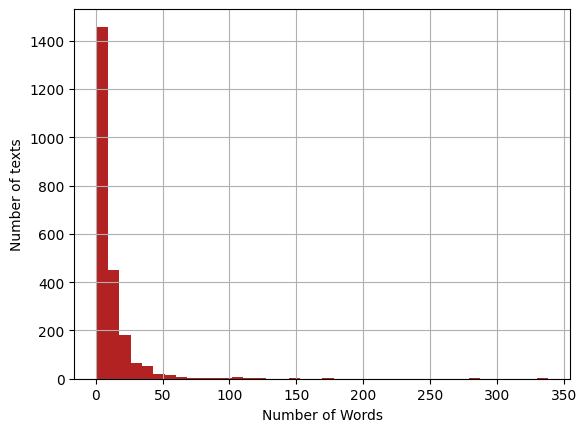

In [ ]:
# Plot histogram of the number of words in train data 'title'
seq_len = [len(title.split()) for title in train_text]

pd.Series(seq_len).hist(bins = 40,color='firebrick')
plt.xlabel('Number of Words')
plt.ylabel('Number of texts')

In [ ]:
# BERT Tokeizer Functionality
sample_data = ["Barana pakshathin matoru niyamam.nalla moyanth manthrii"]                                         # sample data
tokenized_sample_data = tokenizer.batch_encode_plus(sample_data,
                                                    padding=True)     # encode text
print(tokenized_sample_data)



{'input_ids': [[101, 3347, 5162, 22190, 7377, 15222, 2078, 13523, 2953, 2226, 9152, 11613, 2213, 1012, 6583, 4571, 9587, 7054, 2705, 2158, 2705, 3089, 2072, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [ ]:
# Majority of titles above have word length under 15. So, we set max title length as 15
MAX_LENGHT = 15
# Tokenize and encode sequences in the train set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)
# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)
# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

In [ ]:
# Assuming 'train_labels' is a DataFrame column with string labels ('Fake' or 'original')
label_mapping = {'Fake': 0, 'original': 1}
train_labels_encoded = train_labels.map(label_mapping)

# Convert to tensor
train_y = torch.tensor(train_labels_encoded.tolist())
print(train_labels.dtypes)
print(train_labels.unique())
label_mapping = {'Fake': 0, 'original': 1}
train_labels_encoded = train_labels.map(label_mapping)
train_y = torch.tensor(train_labels_encoded.tolist())
# Assuming 'train_labels' is a DataFrame column containing ['True'] as strings
train_labels_encoded = train_labels.apply(lambda x: 1 if x == 'True' else 0)
train_y = torch.tensor(train_labels_encoded.tolist())


object
['Fake' 'original']


In [ ]:
#Checking the datatypes
print(train_labels.head())
print(train_labels.dtypes)
print(train_labels.unique())

123         Fake
2335        Fake
1849    original
2566        Fake
1320        Fake
Name: label, dtype: object
object
['Fake' 'original']


In [ ]:
# Convert lists to tensors
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_labels_encoded = train_labels.apply(lambda x: 1 if x == 'True' else 0)
train_y = torch.tensor(train_labels_encoded.tolist())


val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_labels_encoded = val_labels.apply(lambda x: 1 if x == 'True' else 0)
val_y = torch.tensor(val_labels_encoded.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
# Assuming 'test_labels' is a list containing boolean values as strings
test_labels_encoded = [1 if label == 'True' else 0 for label in test_labels]
test_y = torch.tensor(test_labels_encoded)


In [ ]:
# Data Loader structure definition
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
batch_size = 32                                               #define a batch size

train_data = TensorDataset(train_seq, train_mask, train_y)    # wrap tensors
train_sampler = RandomSampler(train_data)                     # sampler for sampling the data during training
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
                                                              # dataLoader for train set
val_data = TensorDataset(val_seq, val_mask, val_y)            # wrap tensors
val_sampler = SequentialSampler(val_data)                     # sampler for sampling the data during training
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)
                                                              # dataLoader for validation set

### Freeze Layers

In [ ]:
# Freezing the parameters and defining trainable BERT structure
for param in bert.parameters():
    param.requires_grad = False    # false here means gradient need not be computed

### Define Model Architecture

In [ ]:
class BERT_Arch(nn.Module):
    def __init__(self, bert):
      super(BERT_Arch, self).__init__()
      self.bert = bert
      self.dropout = nn.Dropout(0.1)            # dropout layer
      self.relu =  nn.ReLU()                    # relu activation function
      self.fc1 = nn.Linear(768,512)             # dense layer 1
      self.fc2 = nn.Linear(512,2)               # dense layer 2 (Output layer)
      self.softmax = nn.LogSoftmax(dim=1)       # softmax activation function
    def forward(self, sent_id, mask):           # define the forward pass
      cls_hs = self.bert(sent_id, attention_mask=mask)['pooler_output']
                                                # pass the inputs to the model
      x = self.fc1(cls_hs)
      x = self.relu(x)
      x = self.dropout(x)
      x = self.fc2(x)                           # output layer
      x = self.softmax(x)                       # apply softmax activation
      return x

model = BERT_Arch(bert)
# Defining the hyperparameters (optimizer, weights of the classes and the epochs)
# Define the optimizer
from transformers import AdamW
optimizer = AdamW(model.parameters(),
                  lr = 1e-5)          # learning rate
# Define the loss function
cross_entropy  = nn.NLLLoss()
# Number of training epochs
epochs = 2

### Define Train & Evaluate Function

In [ ]:
# Defining training and evaluation functions
def train():
  model.train()
  total_loss, total_accuracy = 0, 0

  for step,batch in enumerate(train_dataloader):                # iterate over batches
    if step % 50 == 0 and not step == 0:                        # progress update after every 50 batches.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
    batch = [r for r in batch]                                  # push the batch to gpu
    sent_id, mask, labels = batch
    model.zero_grad()                                           # clear previously calculated gradients
    preds = model(sent_id, mask)                                # get model predictions for current batch
    loss = cross_entropy(preds, labels)                         # compute loss between actual & predicted values
    total_loss = total_loss + loss.item()                       # add on to the total loss
    loss.backward()                                             # backward pass to calculate the gradients
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)     # clip gradients to 1.0. It helps in preventing exploding gradient problem
    optimizer.step()                                            # update parameters
    preds=preds.detach().cpu().numpy()                          # model predictions are stored on GPU. So, push it to CPU

  avg_loss = total_loss / len(train_dataloader)                 # compute training loss of the epoch
                                                                # reshape predictions in form of (# samples, # classes)
  return avg_loss                                 # returns the loss and predictions

def evaluate():
  print("\nEvaluating...")
  model.eval()                                    # Deactivate dropout layers
  total_loss, total_accuracy = 0, 0
  for step,batch in enumerate(val_dataloader):    # Iterate over batches
    if step % 50 == 0 and not step == 0:          # Progress update every 50 batches.
                                                  # Calculate elapsed time in minutes.
                                                  # Elapsed = format_time(time.time() - t0)
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))
                                                  # Report progress
    batch = [t for t in batch]                    # Push the batch to GPU
    sent_id, mask, labels = batch
    with torch.no_grad():                         # Deactivate autograd
      preds = model(sent_id, mask)                # Model predictions
      loss = cross_entropy(preds,labels)          # Compute the validation loss between actual and predicted values
      total_loss = total_loss + loss.item()
      preds = preds.detach().cpu().numpy()
  avg_loss = total_loss / len(val_dataloader)         # compute the validation loss of the epoch
  return avg_loss

### Model training

In [ ]:
# Train and predict
best_valid_loss = float('inf')
train_losses=[]                   # empty lists to store training and validation loss of each epoch
valid_losses=[]

for epoch in range(epochs):
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    train_loss = train()                       # train model
    valid_loss = evaluate()                    # evaluate model
    if valid_loss < best_valid_loss:              # save the best model
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'c2_new_model_weights.pt')
    train_losses.append(train_loss)               # append training and validation loss
    valid_losses.append(valid_loss)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 2
  Batch    50  of     72.

Evaluating...

Training Loss: 0.271
Validation Loss: 0.059

 Epoch 2 / 2
  Batch    50  of     72.

Evaluating...

Training Loss: 0.036
Validation Loss: 0.011


### Model performance

In [ ]:
# load weights of best model
path = '/content/c2_new_model_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [ ]:
print(test_y.shape)
print(preds.shape)


In [ ]:
def evaluate():
    print("\nEvaluating...")
    model.eval()
    total_loss, total_accuracy = 0, 0
    all_preds = []

    for step, batch in enumerate(val_dataloader):
        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

        batch = [t for t in batch]
        sent_id, mask, labels = batch

        with torch.no_grad():
            preds = model(sent_id, mask)
            loss = cross_entropy(preds, labels)
            total_loss = total_loss + loss.item()
            preds = preds.detach().cpu().numpy()
            all_preds.append(preds)

    avg_loss = total_loss / len(val_dataloader)
    return avg_loss, all_preds
valid_loss, val_preds = evaluate()  # evaluate model
# ... (rest of the code)

# Access the predictions
print(test_y.shape)
print(val_preds[-1].shape)  # Use the last batch's predictions or modify as needed



Evaluating...
torch.Size([489])
(5, 2)


## Fake News Predictions

In [ ]:
import pandas as pd
import torch
from torch.utils.data import DataLoader
from transformers import BertTokenizer, BertForSequenceClassification
from tqdm import tqdm

# Load your test data into a DataFrame (replace 'your_test_data.csv' with your actual file name)
test_data = pd.read_csv('/content/Fake_test_without_labels.csv')

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# Tokenize and encode the test data
test_encodings = tokenizer(test_data['text'].tolist(), padding=True, truncation=True, return_tensors='pt')

# Create a DataLoader for the test data
test_dataset = torch.utils.data.TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'])
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Make predictions on the test data
all_predictions = []
with torch.no_grad():
    for batch in tqdm(test_loader, desc="Predicting"):
        input_ids, attention_mask = batch
        input_ids, attention_mask = input_ids.to(device), attention_mask.to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        # Convert predictions to boolean values (True or False)
        predictions = torch.argmax(logits, dim=1)
        boolean_predictions = predictions.bool()

        all_predictions.extend(boolean_predictions.cpu().numpy())

# Add boolean predictions to the original test data
test_data['boolean_predictions'] = all_predictions

# Save predictions to a CSV file
test_data.to_csv('/content/BERT_predictions.csv', index=False)

print("Predictions saved to BERT_predictions.csv")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Predicting: 100%|██████████| 128/128 [00:13<00:00,  9.61it/s]


Predictions saved to BERT_predictions.csv


In [ ]:
print(test_data)